### **Support Vector Machines: Classifying Handwritten Digits**

#### Objective:
Your task is to build a **Support Vector Machine (SVM)** classifier to recognize handwritten digits from the famous **Digits dataset**. This homework will help you understand how SVM works for multi-class classification and how kernel tricks can improve performance.

---

#### Dataset:
Use the **Digits dataset** from `sklearn.datasets`. It contains 8x8 grayscale images of handwritten digits (0–9), represented as feature vectors.

---

#### Steps to Complete:

1. **Load the Dataset**
   - Import the `load_digits` dataset from `sklearn.datasets`.
   - Load the features (`data`) and labels (`target`).
   - Display the shape of the data and a few sample images using `matplotlib`.

2. **Data Exploration**
   - Explore the dataset:
     - How many samples and features are there?
     - What is the distribution of the target classes (0–9)?
   - Plot a few example digits with their corresponding labels.

3. **Data Splitting**
   - Split the dataset into training (80%) and test (20%) sets using `train_test_split` from `sklearn.model_selection`.
   - Standardize the feature values using `StandardScaler`.

4. **Build an SVM Classifier**
   - Train an SVM classifier using `SVC` from `sklearn.svm` with:
     - **Linear kernel**.
   - Evaluate the model on the test set using:
     - **Accuracy Score**.
     - **Confusion Matrix**.
     - **Classification Report** (precision, recall, F1-score).

5. **Experiment with Kernels**
   - Train and evaluate SVM classifiers with different kernels:
     - **Polynomial kernel** (`kernel='poly'`).
     - **Radial Basis Function (RBF) kernel** (`kernel='rbf'`).
   - Compare their performance (accuracy, F1-score, etc.).

6. **Hyperparameter Tuning**
   - Use `GridSearchCV` to find the best values for SVM hyperparameters, such as:
     - `C`: Regularization parameter.
     - `gamma`: Kernel coefficient for RBF.
     - `degree`: Polynomial kernel degree.
   - Report the best hyperparameters and the resulting model performance.

7. **Visualization**
   - Plot a confusion matrix for the best model.
   - Use `PCA` or `t-SNE` to reduce the dimensionality of the feature space to 2D or 3D and visualize the data distribution.

---

#### Bonus Challenges (Optional):

1. **Feature Importance**
   - Analyze the support vectors and discuss their role in defining the decision boundaries.

2. **Custom Kernel**
   - Implement a custom kernel function and train the SVM with it.

3. **Comparison with Other Models**
   - Compare the performance of SVM with another classifier, such as:
     - **Logistic Regression**.
     - **Random Forest**.

4. **Real-World Application**
   - Extend the task to a larger dataset, such as **MNIST** (available through `tensorflow` or `keras.datasets`), and train an SVM on a subset of the data (e.g., 5,000 samples).

---

#### Deliverables:
- A Python script or Jupyter Notebook containing:
  - Code for loading, exploring, and preprocessing the dataset.
  - Implementation of SVM with different kernels and hyperparameters.
  - Evaluation results and visualizations.
- A brief report discussing:
  - How well the SVM performed with different kernels.
  - The impact of hyperparameter tuning on model performance.
  - Observations about the dataset and the classification task.

---

#### Useful Hints:
- Use `seaborn` for advanced visualizations (e.g., heatmaps for confusion matrix).
- Remember to scale the data before training the SVM for better results.
- For hyperparameter tuning, set `verbose=2` in `GridSearchCV` to track the process.

---

### Key Learning Goals:
- Understand how SVM handles multi-class classification.
- Learn the impact of different kernels on SVM performance.
- Develop skills in hyperparameter tuning and result interpretation.
- Explore the role of support vectors and decision boundaries in SVM.

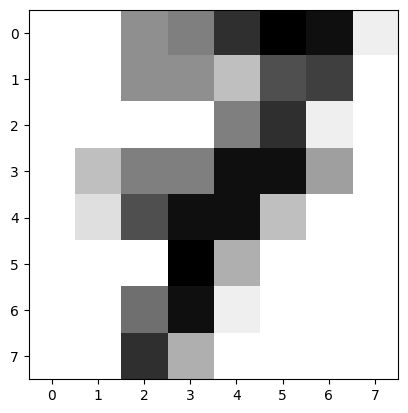

In [8]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 

digits = load_digits(as_frame=False)

X = digits.data 
y = digits.target

plt.imshow(X[7].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    train_size=0.8, 
    random_state=43
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)


SVC(kernel='linear')

In [16]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9777777777777777
[[42  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0]
 [ 0  2  0  0 41  0  0  0  0  1]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  2  0  0  0  0  0  0 40  1]
 [ 0  0  0  0  0  1  0  0  1 37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.89      1.00      0.94        32
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        25
           4       1.00      0.93      0.96        44
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        41
           7       1.00      1.00      1.00        39
           8       0.98      0.93      0.95        43
           9       0.95      0.95      0.95        39

    accuracy                           0.98       360


In [17]:
from sklearn.svm import SVC

model = SVC(kernel='poly')
model.fit(X_train, y_train)

SVC(kernel='poly')

In [18]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9694444444444444
[[42  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  1  0]
 [ 0  1  0  0 42  0  0  0  0  1]
 [ 0  0  0  0  0 29  0  0  1  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 38  1  0]
 [ 0  1  0  0  0  0  0  0 42  0]
 [ 0  1  0  0  0  0  0  1  2 35]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.91      1.00      0.96        32
           2       1.00      1.00      1.00        25
           3       1.00      0.96      0.98        25
           4       1.00      0.95      0.98        44
           5       1.00      0.97      0.98        30
           6       1.00      0.98      0.99        41
           7       0.97      0.97      0.97        39
           8       0.88      0.98      0.92        43
           9       0.97      0.90      0.93        39

    accuracy                           0.97       360


In [19]:
from sklearn.svm import SVC

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [20]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9805555555555555
[[42  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0]
 [ 0  0  0  0 43  0  0  0  0  1]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  1]
 [ 0  2  0  0  1  0  0  0 40  0]
 [ 0  0  0  0  0  0  0  1  1 37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.94      1.00      0.97        32
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        25
           4       0.98      0.98      0.98        44
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        41
           7       0.97      0.97      0.97        39
           8       0.98      0.93      0.95        43
           9       0.95      0.95      0.95        39

    accuracy                           0.98       360


In [32]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

SVC()

In [35]:
param_grid ={
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'degree': [1, 2, 3, 4]
}

from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

cv.fit(X_train, y_train)
print(cv.best_params_)
print(cv.best_score_)

y_pred = cv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
# print('y_pred', y_pred)
print("accuracy_score", accuracy_score( y_test, y_pred))
print("confusion_matrix", confusion_matrix(y_test, y_pred))
print('classification_report',classification_report( y_test, y_pred))

{'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
0.986086914440573
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.97      1.00      0.98        32
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        25
           4       1.00      0.95      0.98        44
           5       0.97      0.97      0.97        30
           6       1.00      1.00      1.00        41
           7       1.00      1.00      1.00        39
           8       0.98      1.00      0.99        43
           9       0.95      0.95      0.95        39

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

accuracy_score 0.9861111111111112
confusion_matrix [[42  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0]
 [ 0  0  0 25  0 

In [28]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print('y_pred', y_pred)
# print("accuracy_score", accuracy_score( y_test, y_pred))
# print("confusion_matrix", confusion_matrix(y_test, y_pred))
# print('classification_report',classification_report( y_test, y_pred))

y_pred [1 8 3 8 6 0 6 5 1 1 7 1 3 3 2 6 0 4 7 4 7 0 0 8 5 0 8 2 3 3 8 6 9 1 0 7 6
 7 4 8 9 6 4 0 4 6 4 4 6 0 5 0 5 4 5 9 7 5 7 4 4 6 4 6 5 4 1 5 6 1 7 4 2 6
 7 4 0 4 0 8 8 0 3 5 9 6 0 5 3 0 0 4 6 9 6 6 9 4 6 9 3 7 8 9 7 0 3 3 6 3 5
 2 1 1 7 7 7 7 7 0 9 2 5 7 7 4 8 3 2 6 8 0 1 6 4 4 8 0 9 0 1 6 1 7 3 2 0 5
 0 7 8 9 6 0 1 5 7 1 0 7 4 1 7 9 8 2 6 4 9 7 7 5 8 0 2 9 5 6 4 5 4 2 9 6 4
 1 8 7 8 7 2 6 1 6 1 4 2 6 1 8 3 6 9 0 8 2 9 4 7 9 8 4 5 2 1 9 1 8 6 2 9 8
 1 1 1 5 2 8 8 5 9 2 9 2 9 2 1 8 8 9 6 8 3 1 0 3 1 1 5 4 7 6 2 4 6 4 9 9 2
 0 6 5 6 0 3 7 5 0 0 3 4 5 8 9 2 1 6 7 9 6 9 3 3 7 4 3 5 8 9 4 0 0 9 1 1 0
 4 3 7 6 3 0 3 8 0 4 1 3 5 3 1 2 8 0 0 3 6 8 1 7 5 8 7 2 0 4 1 7 3 8 0 4 1
 1 5 5 2 8 9 9 0 4 8 8 6 8 9 4 9 7 7 8 9 6 8 7 0 4 1 1]
accuracy_score 0.9638888888888889
confusion_matrix [[42  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0]
 [ 0  2  0  0 41  0  0  0  0  1]
 [ 0  1  0  0  0 29  0  0  0  0]
 [ 0  0  0  0